In [37]:
!pip install typing langchain langgraph 

In [38]:
from langgraph.graph import StateGraph
from typing import Dict ,TypedDict, Optional

In [39]:
class AgentState(TypedDict):
    name:str
    message:Optional[str]


def greeter_node(state:AgentState )-> AgentState:
    """greets the user """
    state['message'] = f'hello {state["name"]} how are you . \n'
    

    return state


In [40]:
# this is a compliment node 

def compliment_node(state:AgentState )->AgentState:
    """ this node complement the user"""

    state['message'] = f'you are doing well learning langgraph {state["name"]} .'

    return state

In [41]:
#start and the end node to our graph

graph = StateGraph(AgentState)

graph.add_node('greeter',greeter_node)
graph.add_node('compliment',compliment_node)

#start and end point
graph.set_entry_point('greeter')
graph.set_finish_point('compliment')


app = graph.compile()

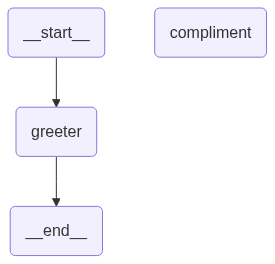

In [42]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [43]:
app.invoke({'name':'bob'})

{'name': 'bob', 'message': 'hello bob how are you . \n'}